In [1]:
# Performed as a part of curriculum at Great Learning with instructor guidance
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
train_data=pd.read_csv('train_V2.csv')

In [7]:
train_data.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [6]:
test_data=pd.read_csv('test_V2.csv')

In [5]:
test_data.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints
0,9329eb41e215eb,676b23c24e70d6,45b576ab7daa7f,0,0,51.46,0,0,0,73,...,1500,0,0.0,0,0.0,0,0,588.0,1,0
1,639bd0dcd7bda8,430933124148dd,42a9a0b906c928,0,4,179.10,0,0,2,11,...,1503,2,4669.0,0,0.0,0,0,2017.0,6,0
2,63d5c8ef8dfe91,0b45f5db20ba99,87e7e4477a048e,1,0,23.40,0,0,4,49,...,1565,0,0.0,0,0.0,0,0,787.8,4,0
3,cf5b81422591d1,b7497dbdc77f4a,1b9a94f1af67f1,0,0,65.52,0,0,0,54,...,1465,0,0.0,0,0.0,0,0,1812.0,3,0
4,ee6a295187ba21,6604ce20a1d230,40754a93016066,0,4,330.20,1,2,1,7,...,1480,1,0.0,0,0.0,0,0,2963.0,4,0


In [6]:
 train_data.shape

(4446966, 29)

In [7]:
test_data.shape

(1934174, 28)

In [8]:
train_data.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,...,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446965e+06
mean,2.338149e-01,1.106908e+00,1.307171e+02,6.578755e-01,2.268196e-01,1.370147e+00,4.759935e+01,5.050060e+02,9.247833e-01,5.439551e-01,...,1.646590e-01,6.061157e+02,3.496091e-03,4.509322e+00,2.386841e-02,7.918208e-03,1.154218e+03,3.660488e+00,6.064601e+02,4.728216e-01
std,5.885731e-01,1.715794e+00,1.707806e+02,1.145743e+00,6.021553e-01,2.679982e+00,2.746294e+01,6.275049e+02,1.558445e+00,7.109721e-01,...,4.721671e-01,1.498344e+03,7.337297e-02,3.050220e+01,1.673935e-01,9.261157e-02,1.183497e+03,2.456544e+00,7.397004e+02,3.074050e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.551000e+02,2.000000e+00,0.000000e+00,2.000000e-01
50%,0.000000e+00,0.000000e+00,8.424000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.856000e+02,3.000000e+00,0.000000e+00,4.583000e-01
75%,0.000000e+00,2.000000e+00,1.860000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.172000e+03,1.000000e+00,1.000000e+00,...,0.000000e+00,1.909750e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.976000e+03,5.000000e+00,1.495000e+03,7.407000e-01
max,2.200000e+01,3.300000e+01,6.616000e+03,5.300000e+01,6.400000e+01,8.000000e+01,1.010000e+02,2.170000e+03,7.200000e+01,2.000000e+01,...,3.900000e+01,4.071000e+04,1.800000e+01,3.823000e+03,1.200000e+01,5.000000e+00,2.578000e+04,2.360000e+02,2.013000e+03,1.000000e+00


In [9]:
test_data.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints
count,1.934174e+06,1.934174e+06,1.934174e+06,1.934174e+06,1.934174e+06,1.934174e+06,1.934174e+06,1.934174e+06,1.934174e+06,1.934174e+06,...,1.934174e+06,1.934174e+06,1.934174e+06,1.934174e+06,1.934174e+06,1.934174e+06,1.934174e+06,1.934174e+06,1.934174e+06,1.934174e+06
mean,2.299524e-01,1.104360e+00,1.297406e+02,6.541500e-01,2.258147e-01,1.357999e+00,4.781403e+01,5.094502e+02,9.183569e-01,5.435855e-01,...,8.873689e+02,1.630189e-01,5.909889e+02,3.408690e-03,4.505277e+00,2.335829e-02,7.680798e-03,1.149258e+03,3.627590e+00,6.113582e+02
std,5.785920e-01,1.713828e+00,1.674371e+02,1.133690e+00,5.933918e-01,2.665694e+00,2.746275e+01,6.288322e+02,1.523761e+00,7.090114e-01,...,7.378231e+02,4.682340e-01,1.474899e+03,7.298342e-02,3.026267e+01,1.650875e-01,9.149580e-02,1.179668e+03,2.359042e+00,7.406629e+02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.541000e+02,2.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,8.416000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.800000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,1.442000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.795000e+02,3.000000e+00,0.000000e+00
75%,0.000000e+00,2.000000e+00,1.854000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.175000e+03,1.000000e+00,1.000000e+00,...,1.500000e+03,0.000000e+00,6.300000e-03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.970000e+03,5.000000e+00,1.495000e+03
max,2.700000e+01,2.400000e+01,6.229000e+03,5.900000e+01,4.100000e+01,7.500000e+01,1.000000e+02,2.174000e+03,5.800000e+01,1.500000e+01,...,5.742000e+03,2.000000e+01,4.070000e+04,1.500000e+01,3.271000e+03,9.000000e+00,5.000000e+00,1.491000e+04,1.530000e+02,2.000000e+03


In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

In [11]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1934174 entries, 0 to 1934173
Data columns (total 28 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

In [12]:
train_data.isna().any()

Id                 False
groupId            False
matchId            False
assists            False
boosts             False
damageDealt        False
DBNOs              False
headshotKills      False
heals              False
killPlace          False
killPoints         False
kills              False
killStreaks        False
longestKill        False
matchDuration      False
matchType          False
maxPlace           False
numGroups          False
rankPoints         False
revives            False
rideDistance       False
roadKills          False
swimDistance       False
teamKills          False
vehicleDestroys    False
walkDistance       False
weaponsAcquired    False
winPoints          False
winPlacePerc        True
dtype: bool

In [13]:
train_data["Id"].nunique()

4446966

In [14]:
train_data["groupId"].nunique()

2026745

In [15]:
train_data["matchType"]

0          squad-fpp
1          squad-fpp
2                duo
3          squad-fpp
4           solo-fpp
             ...    
4446961    squad-fpp
4446962         solo
4446963    squad-fpp
4446964    squad-fpp
4446965     solo-fpp
Name: matchType, Length: 4446966, dtype: object

In [16]:
train_data.groupby(["matchType"]).count()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
matchType,,,,,,,,,,,,,,,,,,,,,
crashfpp,6287,6287,6287,6287,6287,6287,6287,6287,6287,6287,...,6287,6287,6287,6287,6287,6287,6287,6287,6287,6287
crashtpp,371,371,371,371,371,371,371,371,371,371,...,371,371,371,371,371,371,371,371,371,371
duo,313591,313591,313591,313591,313591,313591,313591,313591,313591,313591,...,313591,313591,313591,313591,313591,313591,313591,313591,313591,313591
duo-fpp,996691,996691,996691,996691,996691,996691,996691,996691,996691,996691,...,996691,996691,996691,996691,996691,996691,996691,996691,996691,996691
flarefpp,718,718,718,718,718,718,718,718,718,718,...,718,718,718,718,718,718,718,718,718,718
flaretpp,2505,2505,2505,2505,2505,2505,2505,2505,2505,2505,...,2505,2505,2505,2505,2505,2505,2505,2505,2505,2505
normal-duo,199,199,199,199,199,199,199,199,199,199,...,199,199,199,199,199,199,199,199,199,199
normal-duo-fpp,5489,5489,5489,5489,5489,5489,5489,5489,5489,5489,...,5489,5489,5489,5489,5489,5489,5489,5489,5489,5489
normal-solo,326,326,326,326,326,326,326,326,326,326,...,326,326,326,326,326,326,326,326,326,326


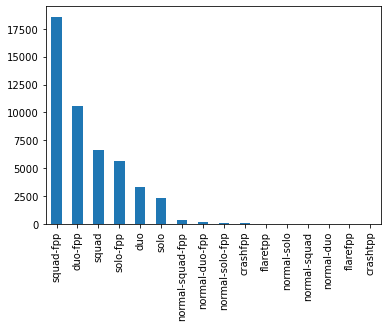

In [17]:
train_data.groupby('matchId')["matchType"].first().value_counts().plot.bar()

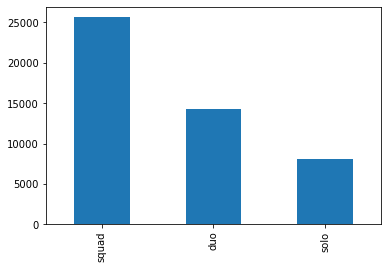

In [11]:
new_train_data=train_data
def mapthematch(data):
    mapping=lambda y:'solo' if ('solo'in y) else 'duo' if ('duo' in y) or ('crash' in y) else 'squad'
    data['matchType']=data['matchType'].apply(mapping)
    return data
data=mapthematch(new_train_data)
data.groupby('matchId')['matchType'].first().value_counts().plot.bar()

In [12]:
matchwise_group_count=data[['matchType','matchId','groupId']]
a=matchwise_group_count.groupby(['matchType','matchId']).count()
print(matchwise_group_count.nunique())
a

matchType          3
matchId        47965
groupId      2026745
dtype: int64


groupId
matchType matchId                
duo       0003b92987589e      100
          0006eb8c17708d       93
          00086c74bb4efc       98
          001125344b660c       96
          001360264d4b5f       91
...                           ...
squad     fff4d3cbb6c317      100
          fffa170cf8ed83       93
          fffd74b5150cb4       97
          fffe562611d981       94
          fffe92232706aa       93

[47965 rows x 1 columns]

In [13]:
groups=data.groupby(['matchType','matchId','groupId']).size().to_frame('players in each group')
groups

players in each group
matchType matchId        groupId                              
duo       0003b92987589e 024136db14272c                      2
                         058b63035c6c08                      2
                         0c7fbc2742917b                      2
                         1add3b8ce32302                      2
                         1ed2da8e6c07b5                      2
...                                                        ...
squad     fffe92232706aa b671eab579d429                      1
                         bd5b4ecf8067ab                      3
                         c8e95cc6c06d41                      6
                         d57f3a3ed40913                      4
                         d8fa9cfd6f9560                      7

[2026745 rows x 1 columns]

In [14]:
data[data['winPlacePerc'].isnull()]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
2744604,f70c74418bb064,12dfbede33f92b,224a123c53e008,0,0,0.0,0,0,0,1,...,0,0.0,0,0.0,0,0,0.0,0,0,NaN


In [15]:
data.drop(2744604,inplace=True)
data[data['winPlacePerc'].isnull()]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc


matchType
duo      [[AxesSubplot(0.125,0.125;0.775x0.755)]]
solo     [[AxesSubplot(0.125,0.125;0.775x0.755)]]
squad    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

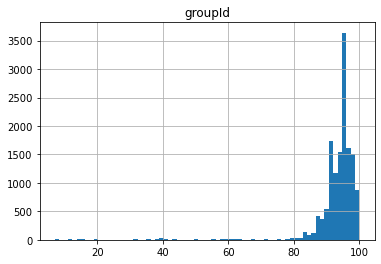

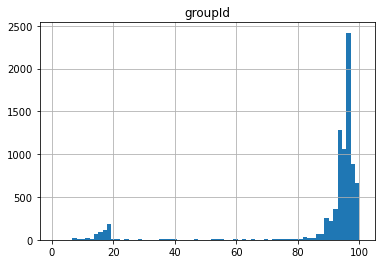

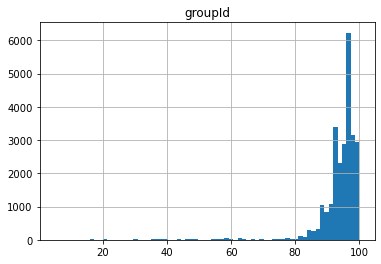

In [16]:
a.groupby('matchType').hist(bins=70)

In [17]:
data['matchDuration'].min()

133

In [18]:
data['matchDuration'].max()

2237

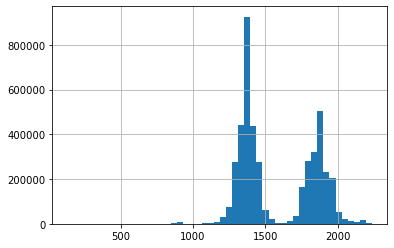

In [19]:
data['matchDuration'].hist(bins=50)

matchType
duo      [[AxesSubplot(0.125,0.125;0.775x0.755)]]
solo     [[AxesSubplot(0.125,0.125;0.775x0.755)]]
squad    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

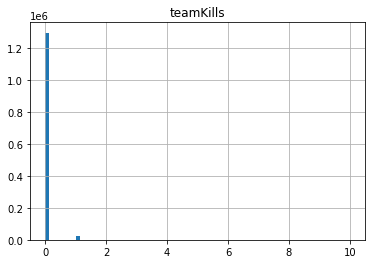

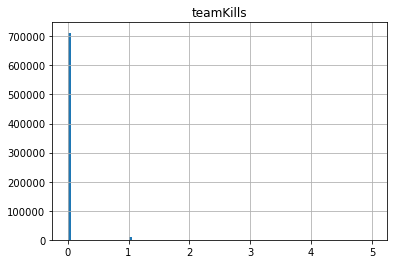

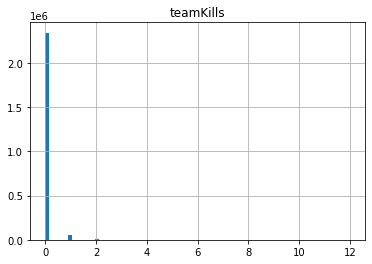

In [20]:
d=data[['teamKills','matchType']]
d.groupby('matchType').hist(bins=80)

In [21]:
# Normalizing the data
data['killsNormalization']=data['kills']*((100-data['kills'])/100+1)
data['damageDealtNormalization']=data['damageDealt']*((100-data['damageDealt'])/100+1)
data['maxPlaceNormalization']=data['maxPlace']*((100-data['maxPlace'])/100+1)
data['matchDurationNormalization']=data['matchDuration']*((100-data['matchDuration'])/100+1)


In [22]:
New_normalized_column=data[['Id','matchDuration','matchDurationNormalization','kills','killsNormalization','maxPlace','maxPlaceNormalization','matchDuration','matchDurationNormalization']]

In [23]:
New_normalized_column.head()

,Id,matchDuration,matchDurationNormalization,kills,killsNormalization,maxPlace,maxPlaceNormalization,matchDuration,matchDurationNormalization
0,7f96b2f878858a,1306,-14444.36,0,0.00,28,48.16,1306,-14444.36
1,eef90569b9d03c,1777,-28023.29,0,0.00,26,45.24,1777,-28023.29
2,1eaf90ac73de72,1318,-14735.24,0,0.00,50,75.00,1318,-14735.24
3,4616d365dd2853,1436,-17748.96,0,0.00,31,52.39,1436,-17748.96
4,315c96c26c9aac,1424,-17429.76,1,1.99,97,99.91,1424,-17429.76


In [24]:
New_normalized_column.shape

(4446965, 9)

In [25]:
# Create new features
data['healsandboostsfeature']=data['heals']+data['boosts']
data[['heals','boosts','healsandboostsfeature']].head()

,heals,boosts,healsandboostsfeature
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [26]:
data['totalDistanceTravelled']=data['rideDistance']+data['walkDistance']+data['swimDistance']
data['totalDistanceTravelled']

0           244.8000
1          1445.0445
2           161.8000
3           202.7000
4            49.7500
             ...    
4446961    2311.0000
4446962      81.7000
4446963     790.8840
4446964    2748.0000
4446965    2613.0000
Name: totalDistanceTravelled, Length: 4446965, dtype: float64

In [27]:
data['headshot_rate']=data['headshotKills']/data['kills']
data['headshot_rate']

0          NaN
1          NaN
2          NaN
3          NaN
4          0.0
          ... 
4446961    NaN
4446962    NaN
4446963    NaN
4446964    0.5
4446965    0.0
Name: headshot_rate, Length: 4446965, dtype: float64

In [28]:
data.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,weaponsAcquired,winPoints,winPlacePerc,killsNormalization,damageDealtNormalization,maxPlaceNormalization,matchDurationNormalization,healsandboostsfeature,totalDistanceTravelled,headshot_rate
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,1,1466,0.4444,0.00,0.000000,48.16,-14444.36,0,244.8000,NaN
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,5,0,0.6400,0.00,99.272391,45.24,-28023.29,0,1445.0445,NaN
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,2,0,0.7755,0.00,89.760000,75.00,-14735.24,0,161.8000,NaN
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,3,0,0.1667,0.00,54.975900,52.39,-17748.96,0,202.7000,NaN
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,2,0,0.1875,1.99,100.000000,99.91,-17429.76,0,49.7500,0.0


In [29]:
data.shape

(4446965, 36)

In [30]:
data['killsWithoutMovinganytime']=((data['kills']>0)&(data['totalDistanceTravelled']==0))

In [31]:
data['killsWithoutMovinganytime']

0          False
1          False
2          False
3          False
4          False
           ...  
4446961    False
4446962    False
4446963    False
4446964    False
4446965    False
Name: killsWithoutMovinganytime, Length: 4446965, dtype: bool

In [32]:
data[data['killsWithoutMovinganytime']==True].shape

(1535, 37)

In [33]:
# Remove outliers
data.drop(data[data['killsWithoutMovinganytime']==True].index,inplace=True)

c:\users\siddhartha borpuzari\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


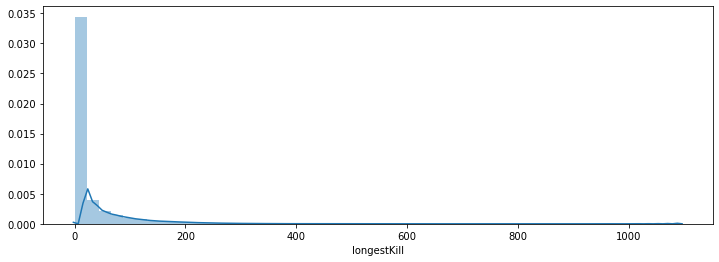

In [34]:
import seaborn as sns
plt.figure(figsize=(12,4))
sns.distplot(data['longestKill'])
plt.show()

In [35]:
data[data['longestKill']>=900].head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,winPoints,winPlacePerc,killsNormalization,damageDealtNormalization,maxPlaceNormalization,matchDurationNormalization,healsandboostsfeature,totalDistanceTravelled,headshot_rate,killsWithoutMovinganytime
49933,8d84a760b76634,dcbeb664940a34,ecf0c4f12fbd6a,0,4,1550.0,14,10,2,1,...,0,0.7143,29.44,-20925.0000,49.59,-30002.25,6,8561.00,0.625000,False
144856,0d65331cbe09bf,f50d852ff41035,6575f2a4ef9fd4,5,0,869.6,0,3,0,8,...,0,0.7500,19.00,-5822.8416,9.75,-2350.25,0,241.20,0.300000,False
156541,dd0a5d30e785c0,4cb8d3787b8150,a211eaf999b492,2,0,1119.0,0,2,1,11,...,1500,0.5000,20.79,-10283.6100,37.59,-6268.04,1,27.35,0.181818,False
180680,14eda1bf0c65f8,ad03385288412a,6b9acd66007d2a,2,5,121.6,0,0,1,25,...,0,0.8936,1.99,95.3344,72.96,-34310.25,6,3500.00,0.000000,False
195021,f141f7e776138b,a0fa42bf37e9f0,0b4c9543bc9199,1,4,784.2,5,4,5,4,...,1523,0.8485,7.84,-4581.2964,56.44,-43581.00,9,9925.00,1.000000,False


In [36]:
# Remove outliers
data.drop(data[data['longestKill']>=900].index,inplace=True)

In [37]:
data.shape

(4445290, 37)

In [38]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression

In [39]:
data.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc', 'killsNormalization',
       'damageDealtNormalization', 'maxPlaceNormalization',
       'matchDurationNormalization', 'healsandboostsfeature',
       'totalDistanceTravelled', 'headshot_rate', 'killsWithoutMovinganytime'],
      dtype='object')

In [40]:
x=data[['killsNormalization','damageDealtNormalization','maxPlaceNormalization','matchDurationNormalization','healsandboostsfeature','totalDistanceTravelled']]

In [41]:
y=data['winPlacePerc']

In [42]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=12)

In [43]:
lr=LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
Y_pred=lr.predict(X_test)
Y_pred

array([0.31062947, 0.33264313, 0.28598227, ..., 1.01322875, 0.24091059,
       0.52909721])

In [45]:
print(lr.intercept_)

0.33754850244980916


In [46]:
print(lr.coef_)

[1.95037806e-02 1.07330382e-05 1.75451719e-03 8.81682699e-06
 1.56760592e-02 8.48557309e-05]


In [47]:
df=pd.DataFrame({'Actual':Y_test,'Predicted':Y_pred})
df

,Actual,Predicted
1352476,0.9615,0.310629
1889030,0.4348,0.332643
3205398,0.3448,0.285982
3018281,0.9792,1.041508
1240967,0.0000,0.138431
...,...,...
257405,0.6923,0.826640
761600,0.2128,0.371035
1088764,0.8966,1.013229
2367261,0.0370,0.240911


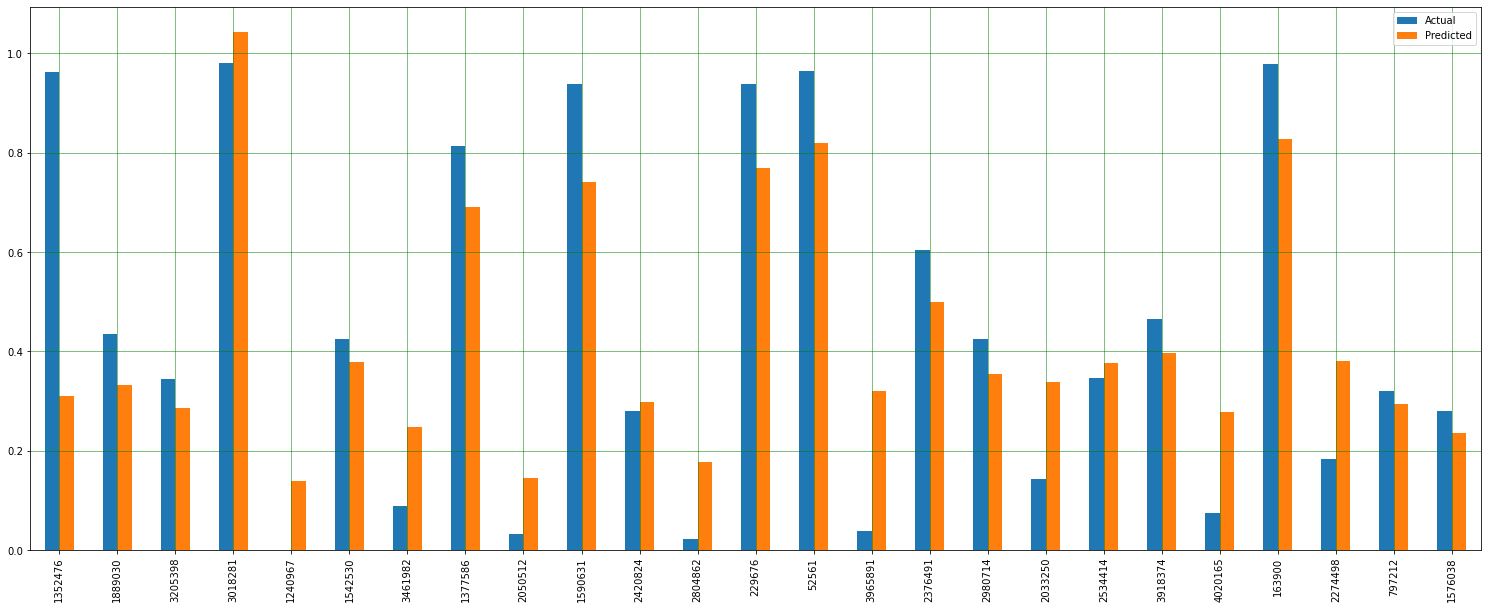

In [48]:
df1=df.head(25)
df1.plot(kind='bar',figsize=(26,10))
plt.grid(which='major',linestyle='-',linewidth='0.5',color='green')
plt.grid(which='minor',linestyle=':',linewidth='0.5',color='black')
plt.show()

In [49]:
print('Mean Absolute Error:',metrics.mean_absolute_error(Y_test,Y_pred))
print('Mean Squared Error:',metrics.mean_squared_error(Y_test,Y_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(Y_test,Y_pred)))

Mean Absolute Error: 0.15553912600794162
Mean Squared Error: 0.037863884622524206
Root Mean Squared Error: 0.19458644511508041
